<table><tr>
<td> <img src="../images/URV.png" style="width: 250px;"/> </td>
<td> <img src="../images/UOC.jpg" style="width: 250px;"/> </td>
</tr></table>

# Quantitative analysis of Solana 

<img src="../images/SOL.png" style="width: 200px;"/>

In the following lines we will construct a brief quantitative analysis of Solana. Its purpose is to show the reader the price and return fluctuations of this crypto and to prove whether its returns can be considered as normally-distributed or not.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import scipy.stats as stats

# Establishing the cryptocurrency ticker
crypto = 'SOL'

___

## Import SOL data

In [2]:
# Importing data with Dask for time optimization
df = pd.read_csv('../Crypto prices/{}USDT.csv'.format(crypto))
df.set_index(pd.to_datetime(df['datetime']), inplace = True)

# First 5 rows
df.head(5)

,datetime,close,perc_return,cum_return,log_return,volume,trades
datetime,,,,,,,
2020-08-11 08:00:00,2020-08-11 08:00:00,2.8500,NaN,NaN,NaN,3.60,1
2020-08-11 08:01:00,2020-08-11 08:01:00,2.8500,0.00000,0.00000,0.00000,0.00,0
2020-08-11 08:02:00,2020-08-11 08:02:00,2.8500,0.00000,0.00000,0.00000,0.00,0
2020-08-11 08:03:00,2020-08-11 08:03:00,3.0003,5.27368,0.05274,5.13932,3410.31,7
2020-08-11 08:04:00,2020-08-11 08:04:00,3.1852,6.16272,0.11761,5.98028,313.95,1


___

## Price and return charts

### Setting arrays

In [3]:
# Setting daily data
daily_prices = df[['close']].resample('D').last()

# Creating the log returns for daily prices
daily_return = round(np.log(daily_prices.close).diff().dropna() * 100, 2)

### SOL price time series

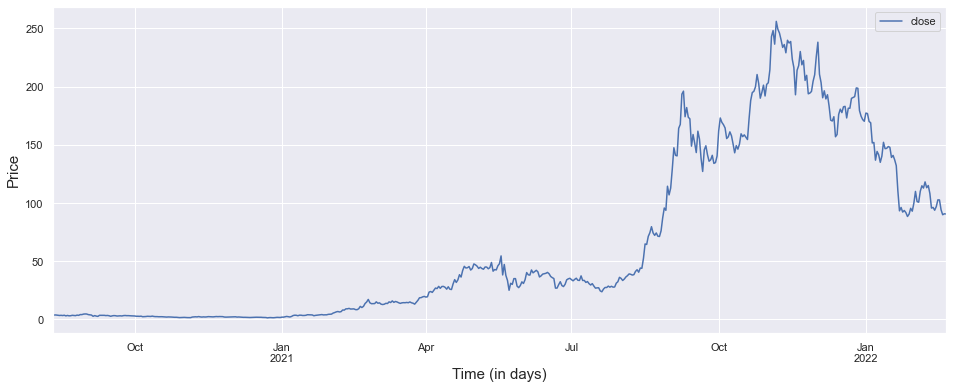

In [4]:
ax1 = daily_prices.plot()
ax1.set_ylabel(ylabel = "Price", fontdict={'fontsize':15})
ax1.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

### SOL log returns

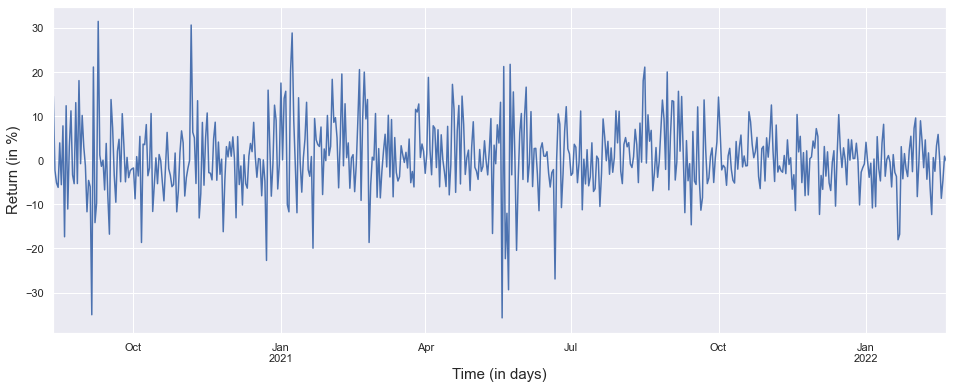

In [5]:
ax2 = daily_return.plot()
ax2.set_ylabel(ylabel = "Return (in %)", fontdict={'fontsize':15})
ax2.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

## Assessing normality

We will now compare and assess the normality of the cryptocurrency's returns against some random numbers that follow a normal distribution. For that, we will replicate a normal distribution with the exact same mean, standard deviation and N as the crypto sample. Later, we will provide a Kurtosis test, a Q-Q plot and both histograms.

### Random normally-distributed numbers

We first pull the most elementary statistical metrics from the sample:

In [6]:
n, minmax, mean, var, skew, kurt = stats.describe(daily_return, nan_policy='omit')
mini, maxi = minmax
std = np.sqrt(var)

# Print the recently-extracted data
daily_return.describe()

count    558.000000
mean       0.597903
std        8.210908
min      -35.730000
25%       -4.275000
50%        0.345000
75%        4.725000
max       31.440000
Name: close, dtype: float64

Then we recreate a normal distribution with the same features as the sample:

In [7]:
# Normally-distributed recreation
normal_distr = stats.norm.rvs(mean, std, n)

### Kurtosis Test

In [8]:
# Kurtosis test for the sample normal distribution
x_test = stats.kurtosistest(normal_distr)

# Kurtosis test for the crypto sample
crypto_test = stats.kurtosistest(daily_return, nan_policy='omit')

# Creating table and showing data
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"{crypto}:  {crypto_test[0]:13.2f}{crypto_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.39          0.6992
SOL:           5.66          0.0000


### Q-Q Plot

#### Normal Sample

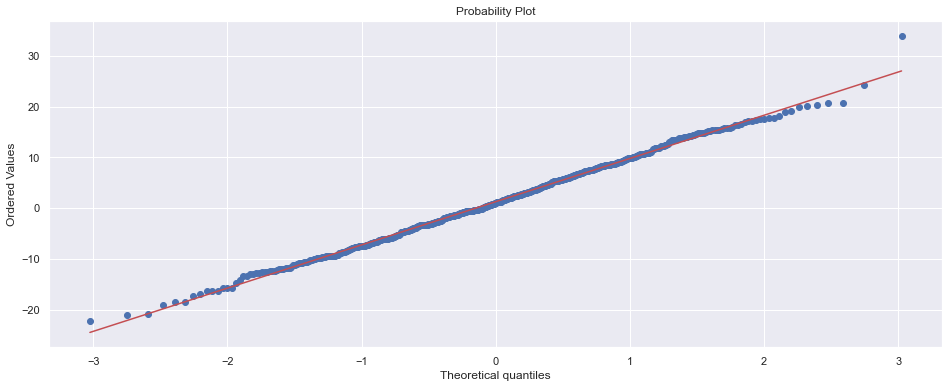

In [9]:
stats.probplot(normal_distr, dist = "norm", plot = plt)
plt.show()

#### SOL Sample

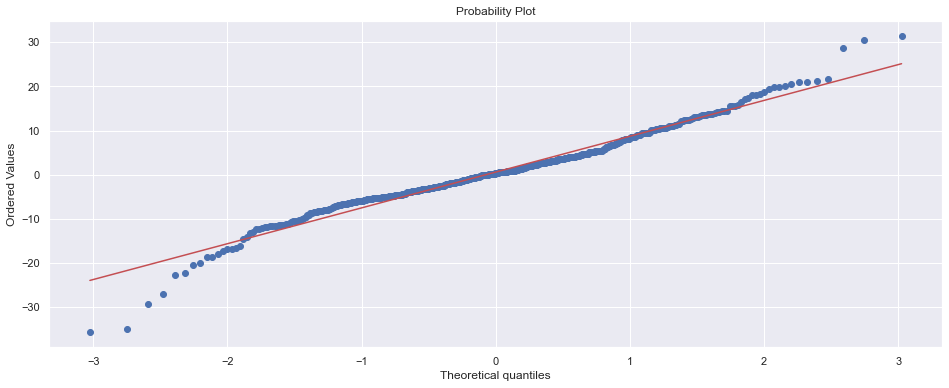

In [10]:
stats.probplot(daily_return, dist = "norm", plot = plt)
plt.show()

### Histograms

#### Normal Sample

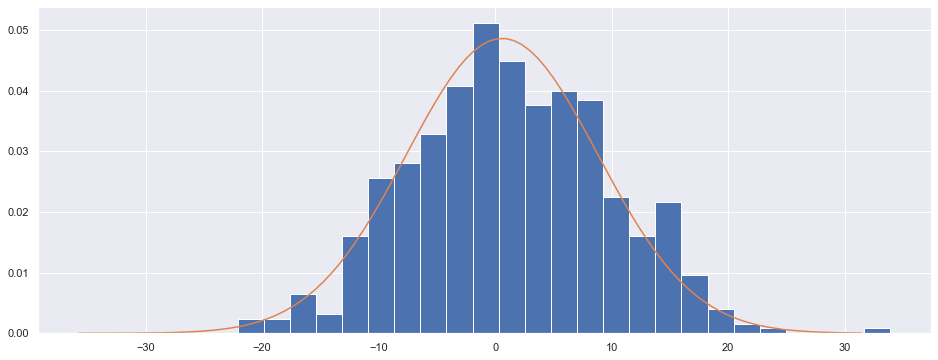

In [11]:
plt.hist(normal_distr, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));

#### SOL Sample

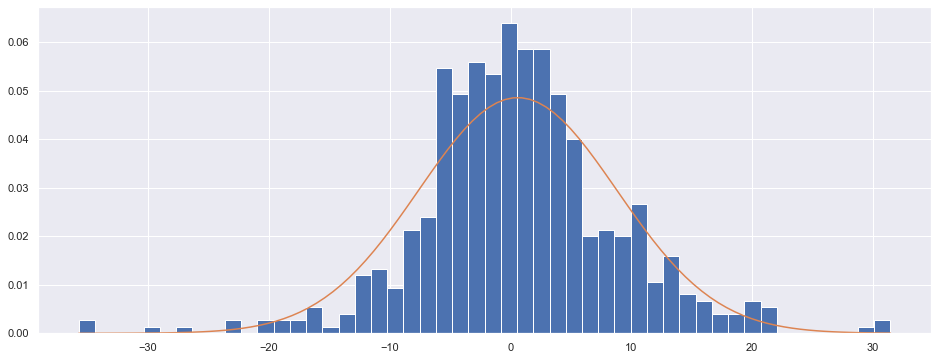

In [12]:
plt.hist(daily_return, bins = 50, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));